# Import Libraries

In [62]:
import numpy as np
import pandas as pd
import re
import plotly.express as px
import matplotlib.pyplot as plt
import missingno as msno
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report,ConfusionMatrixDisplay

# Loading dataset

In [13]:
data = pd.read_csv("data.csv")
data.head()

Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL

In [14]:
data.shape

(6335, 4)

# Data Exploration

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


<Axes: >

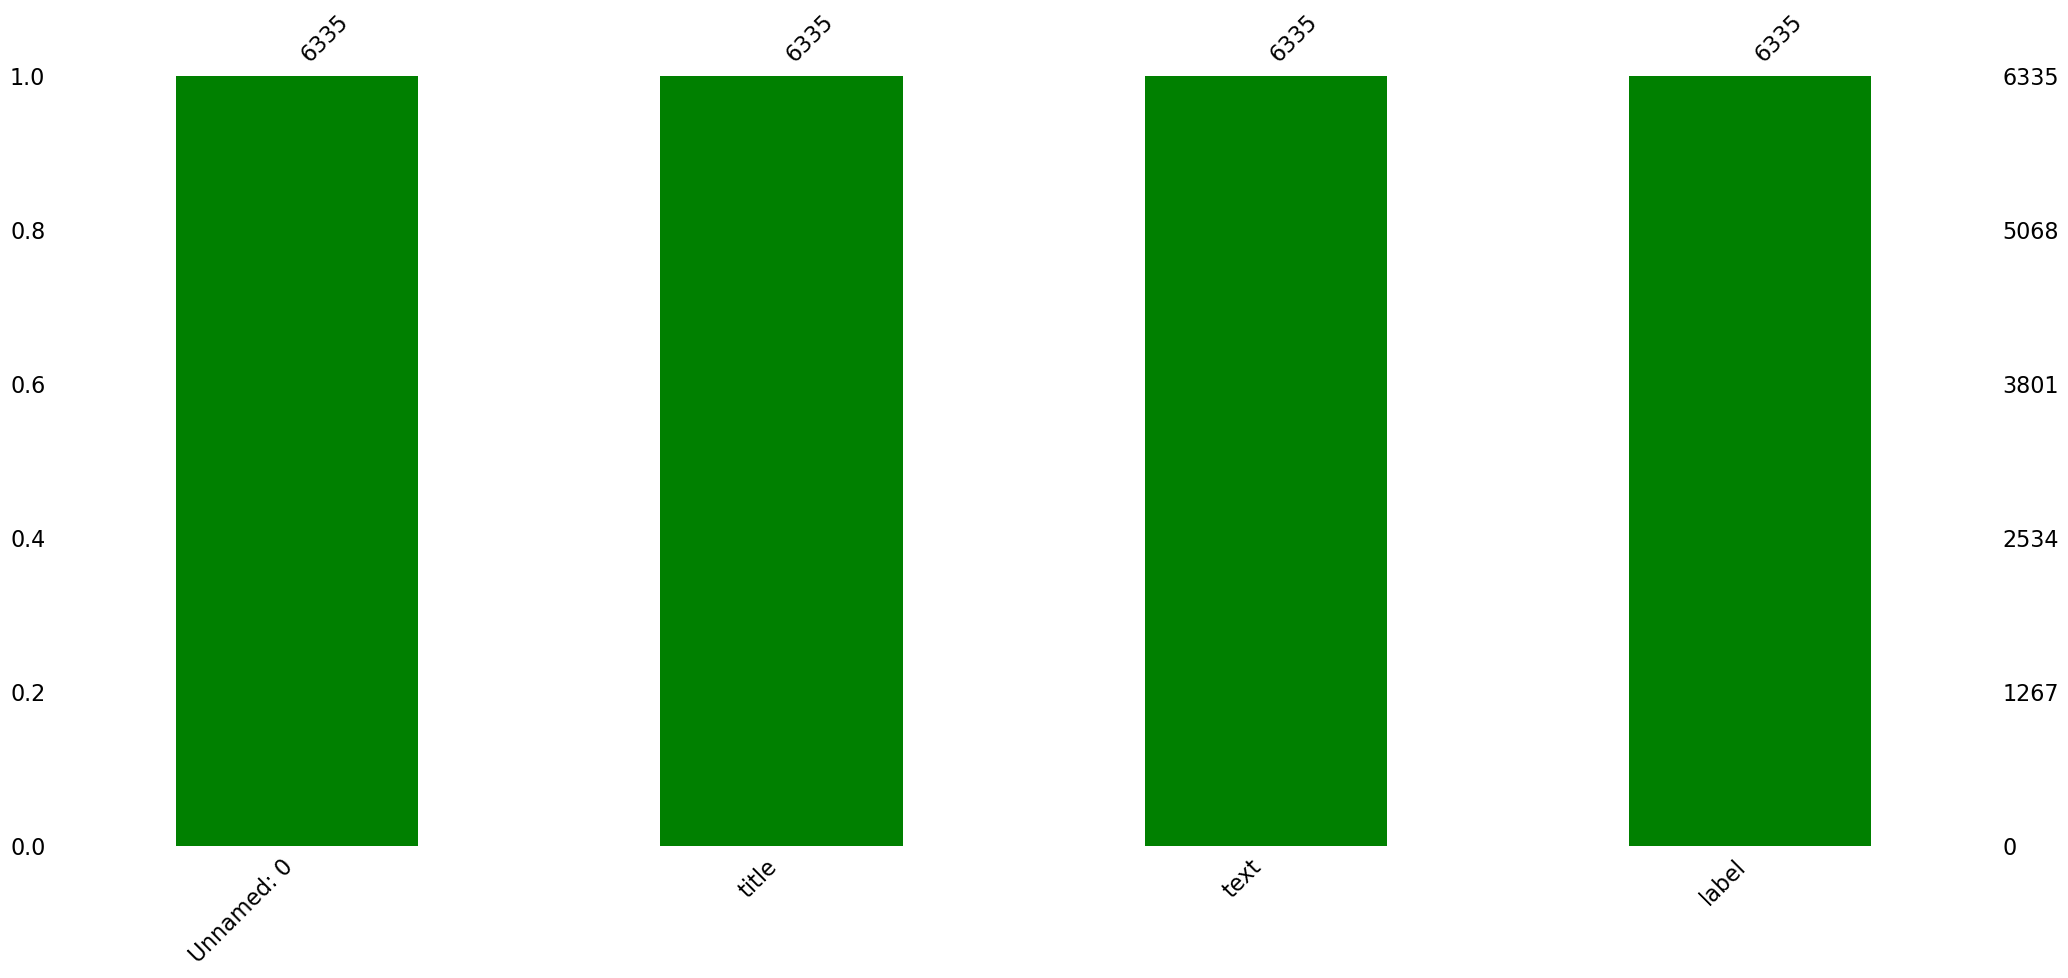

In [16]:
# Checking null values
msno.bar(data,color='g')

In [17]:
# Checking dublicated rows
data.duplicated().sum()

0

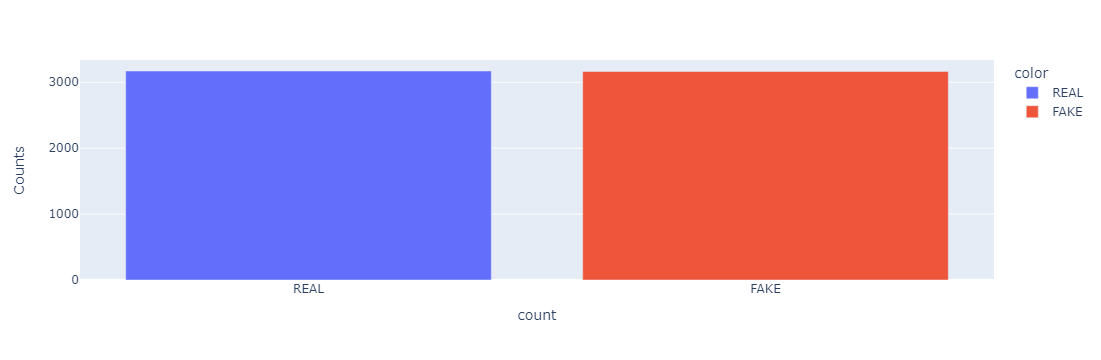

In [19]:
cat = data["label"].value_counts()
fig = px.bar(
    x=cat.index, 
    y=cat.values,
    color=cat.index, 
     labels={"x": cat.name, "y": "Counts"} 
  )
    
fig.show()

# Data Preprocessing

In [37]:
data['label'] = data['label'].map({'REAL': 1, 'FAKE': 0})
data.sample(5)

Unnamed: 0                                              title  \
1856        3288                        Reid Won't Seek Re-Election   
479         7303        Training French soldiers to supervise Daesh   
1237        5560  Re: The U.S. Will Lose Global Reserve Status, ...   
592         8577  ‘A noun, a verb and Donald Trump’: Rubio seeks...   
3967        6967  Get Ready For Civil Unrest: Survey Finds That ...   

                                                   text  label  
1856  Senate Minority Leader Harry Reid (D-Nev.) wil...      1  
479   Training French soldiers to supervise Daesh Vo...      0  
1237  Email \nIn the following interview with the X2...      0  
592   Print \nAs Marco Rubio and Patrick Murphy squa...      0  
3967  \nCould we see violence no matter who wins on ...      0

In [26]:
stopwords=stopwords.words('english')
def remove_stop_words (text:str):
    return " ".join([word for word in text.split(" ") if word not in stopwords])

In [27]:
def remove_special_characters(text):
    special_char_pattern = re.compile(r'[^\w\s\u0600-\u06FF]')
    return special_char_pattern.sub('', text)

In [28]:
def remove_numbers(text):
    number_pattern = re.compile(r'\d+')
    return number_pattern.sub('', text)

In [29]:
def remove_multiple_spaces(text):
    space_pattern = re.compile(r'\s+')
    return space_pattern.sub(' ', text)

In [30]:
cleaned_text = []
ps = PorterStemmer()
def clean_all(text):
    for sample in text:
        sample = remove_stop_words(sample)
        sample = remove_special_characters(sample)
        sample = remove_numbers(sample)
        sample = remove_multiple_spaces(sample)
        sample = ps.stem(sample)
        cleaned_text.append(sample)

In [31]:
clean_all(data['text'])

In [36]:
len(cleaned_text[4]),len(data['text'][4])

(1292, 1840)

# Feature Selection

In [38]:
x = cleaned_text
x

['daniel greenfield shillman journalism fellow freedom center new york writer focusing radical islam in final stretch election hillary rodham clinton gone war fbi the word unprecedented thrown around often election ought retired but its still unprecedented nominee major political party go war fbi but thats exactly hillary people done coma patients waking watching hour cnn hospital beds would assume fbi director james comey hillarys opponent election the fbi attack everyone obama cnn hillarys people circulated letter attacking comey there currently media hit pieces lambasting targeting trump it wouldnt surprising clintons allies start running attack ads fbi the fbis leadership warned entire leftwing establishment form lynch mob continue going hillary and fbis credibility attacked media democrats preemptively head results investigation clinton foundation hillary clinton the covert struggle fbi agents obamas doj people gone explosively public the new york times compared comey j edgar hoov

In [40]:
vectorizer = TfidfVectorizer()
vectorizer.fit(x)
x = vectorizer.transform(x)

<6335x84078 sparse matrix of type '<class 'numpy.float64'>'
	with 1888831 stored elements in Compressed Sparse Row format>

In [41]:
print(x)

  (0, 83087)	0.013136086023169208
  (0, 83061)	0.029876776013077824
  (0, 82885)	0.02143655564926132
  (0, 82482)	0.03660808468492437
  (0, 82461)	0.025019743815767867
  (0, 82407)	0.03627867160950389
  (0, 82357)	0.029684556341610425
  (0, 82350)	0.022213275000725004
  (0, 82346)	0.00853747851112125
  (0, 82164)	0.020159724676289105
  (0, 82070)	0.01652907367693244
  (0, 81942)	0.027668689392350954
  (0, 81941)	0.016379197296221205
  (0, 81866)	0.040836208647615516
  (0, 81770)	0.02493277597331901
  (0, 81601)	0.03441080192997097
  (0, 81497)	0.0349290175155776
  (0, 81463)	0.017957763287311378
  (0, 81303)	0.013575565361130179
  (0, 81284)	0.013988393724216848
  (0, 81256)	0.01869202692392138
  (0, 81249)	0.060625906266327516
  (0, 80978)	0.011360753086229188
  (0, 80924)	0.030254423810535624
  (0, 80787)	0.041950198649847115
  :	:
  (6334, 5378)	0.038680798909957896
  (6334, 5005)	0.03580476221240848
  (6334, 4992)	0.09159746103493499
  (6334, 4990)	0.06612860466613212
  (6334, 4984

In [39]:
y = data['label']
y

0       0
1       0
2       1
3       0
4       1
       ..
6330    1
6331    0
6332    0
6333    1
6334    1
Name: label, Length: 6335, dtype: int64

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=2)

# Training the model

In [43]:
model = LogisticRegression()

In [45]:
model.fit(x_train, y_train)

LogisticRegression()

In [46]:
trainig_prediction = model.predict(x_train)
training_accuracy = accuracy_score(y_train, trainig_prediction)
print("Training Accuracy is " , training_accuracy)

Training Accuracy is  0.9542225730071034


In [51]:
train_evaluation = pd.DataFrame({"Actual Y_train":y_train,"Predicted Y_train":trainig_prediction})
train_evaluation.sample(4)

Actual Y_train  Predicted Y_train
3843               1                  0
1825               1                  1
3893               1                  1
1166               1                  1

In [65]:
# Model Evaluation

In [52]:
test_prediction = model.predict(x_test)
test_accuracy = accuracy_score(y_test, test_prediction)
print("Test Accuracy is " , test_accuracy)

Test Accuracy is  0.9179163378058406


In [53]:
test_evaluation = pd.DataFrame({"Actual Y_test":y_test,"Predicted Y_test":test_prediction})
test_evaluation.sample(4)

Actual Y_test  Predicted Y_test
4795              0                 0
4502              0                 0
4452              1                 1
1490              0                 0

In [55]:
cm = print(confusion_matrix(y_test,test_prediction))
cm

[[601  32]
 [ 72 562]]


In [56]:
print(classification_report(y_test,test_prediction))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       633
           1       0.95      0.89      0.92       634

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267

